## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [4]:
#1
df = pd.read_csv("data_000637.txt", nrows=100000) 
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


In [5]:
#2
column = df["BX_COUNTER"]
x = column.max()
print(x)

3563


In [6]:
#3
mk=pd.DataFrame(df[df['FPGA']==1])
mk['time_ns']=mk['TDC_MEAS']*25/30+mk['BX_COUNTER']*25
ns=mk['time_ns']
time=ns.sum()-ns.min()
print('The data taking lasted',time*pow(10,-9),'seconds')

The data taking lasted 1.3269681758333336 seconds


In [7]:
#4
mk

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
10,1,1,7,3869200167,2785,4,69628.333333
12,1,1,6,3869200167,2792,18,69815.000000
15,1,1,139,3869200167,2797,0,69925.000000
16,1,1,8,3869200167,2787,14,69686.666667
18,1,1,5,3869200167,2795,4,69878.333333
...,...,...,...,...,...,...,...
99989,1,1,106,3869201161,2291,19,57290.833333
99990,1,1,116,3869201161,2297,26,57446.666667
99991,1,1,47,3869201161,2298,7,57455.833333
99992,1,1,107,3869201161,2292,3,57302.500000


In [8]:
#5 Replace the values (all 1) of the HEAD column randomly with 0 or 1.
df['HEAD']=np.random.randint(2, size=len(df))
df['HEAD']

0        0
1        0
2        1
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    1
99999    1
Name: HEAD, Length: 100000, dtype: int32

In [9]:
#6 Create a new DataFrame that contains only the rows with HEAD=1
mask=(df['HEAD']==1)
headOne=pd.DataFrame(df[mask])
headOne

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
2,1,0,63,3869200167,2553,28
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
9,1,0,60,3869200167,2788,7
11,1,0,64,3869200167,2786,19
...,...,...,...,...,...,...
99986,1,1,139,3869201161,2294,0
99987,1,1,105,3869201161,2291,26
99993,1,1,106,3869201161,2304,16
99998,1,0,57,3869201161,2561,23


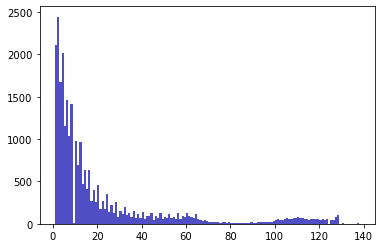

Text(0, 0.5, 'Frequency')

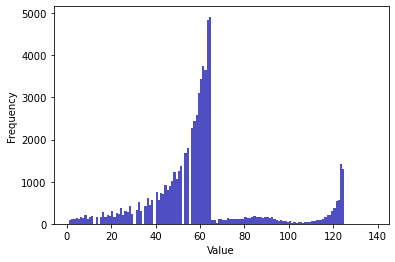

In [10]:
#7 Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
df['HEAD']=1
fpga1=df[df['FPGA']==1]
fpga2=df[df['FPGA']==0]
dtc1=fpga1['TDC_CHANNEL']
dtc2=fpga2['TDC_CHANNEL']

import matplotlib.pyplot as plt

plt.hist(dtc1, bins=np.arange(dtc1.min(), dtc1.max()), color='#0504aa', alpha=0.7)
plt.show()
plt.hist(dtc2, bins=np.arange(dtc2.min(), dtc2.max()), color='#0504aa', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [11]:
#8 Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
C=fpga1.groupby('TDC_CHANNEL').sum()
noisy1=C['FPGA'].nlargest(3)
print(noisy1)
D=fpga2.groupby('TDC_CHANNEL').sum()
noisy2=D['HEAD'].nlargest(3)
print(noisy2)

TDC_CHANNEL
139    2489
2      2444
1      2116
Name: FPGA, dtype: int64
TDC_CHANNEL
139    5831
64     4916
63     4845
Name: HEAD, dtype: int64


In [22]:
# Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

ok=fpga1.groupby('TDC_CHANNEL')['ORBIT_CNT'].nunique()
print(ok.max())
ko=fpga2.groupby('TDC_CHANNEL')['ORBIT_CNT'].nunique()
ko.max()

932


993